# Teoria Classica dei Test {#sec-ctt}

**Prerequisiti**

- Leggere il capitolo 2, *Constructs*, e il capitolo 3, *Raliability*, di @petersen2024principles. 

**Concetti e Competenze Chiave**

**Preparazione del Notebook**

In [80]:
# Carica il file _common.R per impostazioni di pacchetti e opzioni
here::here("code", "_common.R") |> source()
pacman::p_load(psychometric)

## Esercitazioni Assegnate

- A. Spiegare il modello di regressione lineare bivariato, spiegando sia la logica del calcolo dei coefficienti con il metodo dei minimi quadrati, sia l’interpretazione di parametri statistici come l’errore standard della regressione, la scomposizione della varianza e il calcolo del coefficiente di determinazione. Estendere quindi la discussione al modello alla regressione multipla e approfondendo l’interpretazione dei coefficienti parziali di regressione e il loro legame con i coefficienti parziali di correlazione.
- B. Spiegare i concetti principali della CTT con una simulazione.
- C. Calcolare le quantità della CTT per i dati FAI (attendibilità, SEM, stima del punteggio vero con il metodo di Kelley e relativo intervallo di fiducia).
- D. Presentare un esempio della recente letteratura psicologica in cui vengono usati (1) il SEM, e (2) la stima del punteggio vero.
- E. Presentare un esempio della recente letteratura psicologica in cui viene usato il Reliable Change Index (RCI) basato su SEM.
- F. Discutere i limiti della stima SEM della CTT.

## A. Modello di Regressione Lineare

## B. Teoria Classica dei Test

### Simulazione

Simuliamo i dati in modo da riprodurre le tre assunzioni della CTT:

- $\mathbb{E}(E) = 0$
- $\rho_{TE} = 0$
- $\rho_{E_i, E_j} = 0$

In [20]:
set.seed(8394)

n <- 100
Sigma <- matrix(c(6, 0, 0, 3), byrow = TRUE, ncol = 2)
mu <- c(12, 0)
dat <- mvrnorm(n, mu, Sigma, empirical = TRUE)
T <- dat[, 1]
E <- dat[, 2]

Generiamo i punteggi osservati in base alla formula fondamentale della CTT:

In [6]:
X <- T + E

Inseriamo i dati simulati in un data frame:

In [7]:
tibble(X, T, E) |> head()

X,T,E
<dbl>,<dbl>,<dbl>
15.698623,16.765359,-1.0667358
13.657503,12.248096,1.4094073
6.731979,7.852136,-1.1201563
14.621813,14.233699,0.3881133
10.606647,10.187035,0.4196115
12.370288,13.329971,-0.9596831


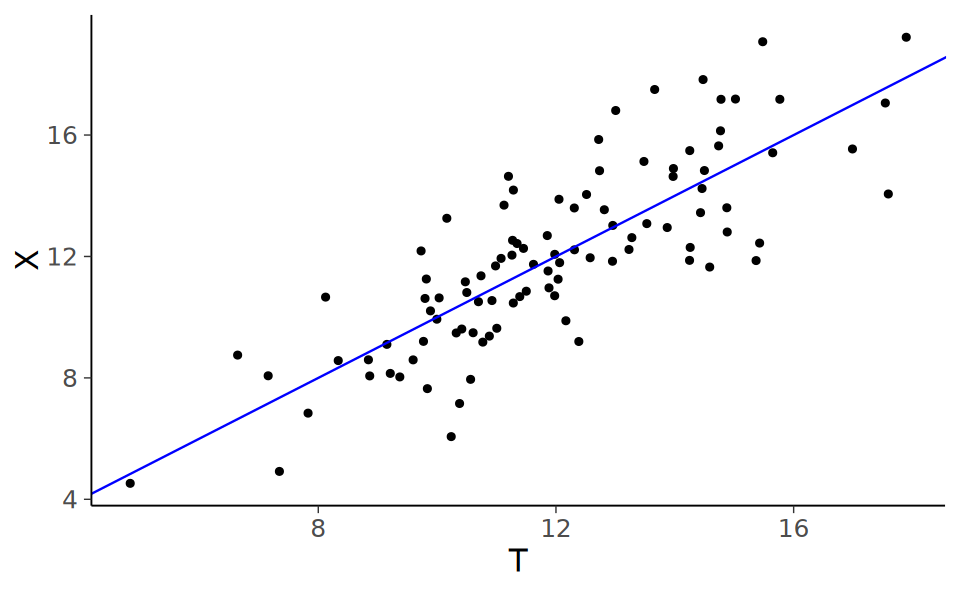

In [8]:
tibble(X, T) |>
    ggplot(aes(T, X)) +
    geom_point(position = position_jitter(w = .3, h = .3)) +
    geom_abline(col = "blue")

In [9]:
mean(T) == mean(X)

[1] TRUE

In [10]:
mean(E) |> round(2)

[1] 0

In [24]:
c(var(T), var(X), var(E))

[1] 6 9 3

In [65]:
var(T) + var(E) 

[1] 9

In [66]:
var(X)

[1] 9

In [12]:
cor(E, T) |> round(2)

[1] 0

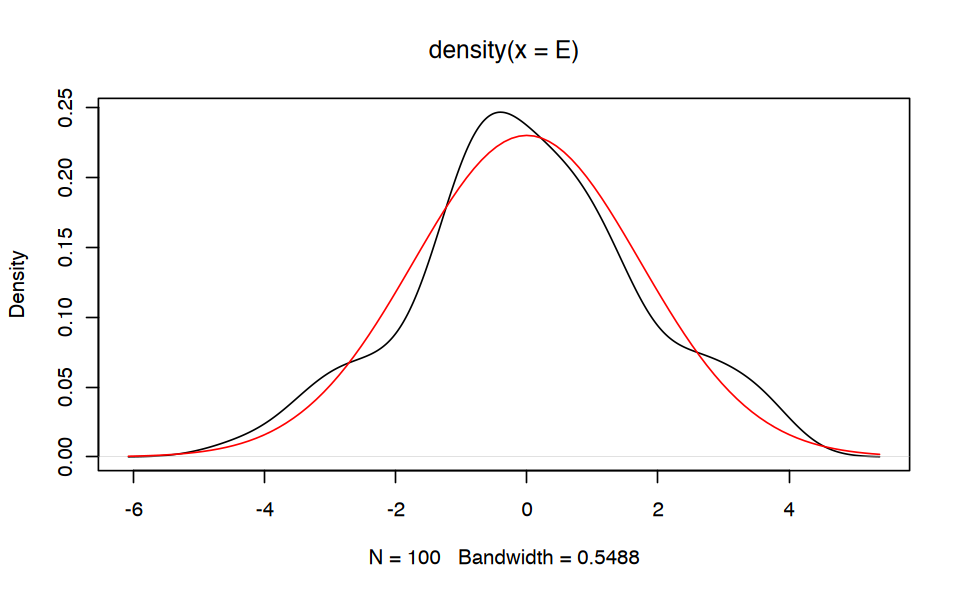

In [13]:
plot(density(E))
curve(dnorm(x, mean(E), sd(E)), add = TRUE, col = "red")

Attendibilità:

In [70]:
rxx <- var(T) / var(X)
rxx

[1] 0.6666667

In [15]:
cor(T, X)^2

[1] 0.6666667

L'attendibilità, in maniera corrispondente, è il coefficiente di determinazione del modello lineare che spiega T in funzione di X:

In [71]:
fm <- lm(T ~ X)
out <- summary(fm)
out$r.squared

[1] 0.6666667

### SEM

L'errore standard della misurazione

In [76]:
SEM <- sd(X) * sqrt(1 - rxx)
SEM |> round(3)

[1] 1.732

è identico alla deviazione standard degli errori:

In [77]:
sqrt(3) |> round(3)

[1] 1.732

In [78]:
sqrt(var(E)) |> round(3)

[1] 1.732

In [ ]:
# Import data 

df_tot <- readRDS(
    here("data", "fai_2022_11_20.rds")
)


# Data wrangling 

# Careless responding
# Filter for rows with FLAG == "keep" and remove the FLAG column
temp <- df_tot |>
    dplyr::filter(FLAG == "keep")
temp$FLAG <- NULL


# Descriptive statistics for the items 

# Compute skewness and kurtosis
items_stats <- psych::describe(temp)

# Identify items with high skewness or kurtosis (absolute values)
items_skew_kurt_bad <- rownames(items_stats)[abs(items_stats$skew) > 2.5 | abs(items_stats$kurtosis) > 7.5]

# Remove NA values from items_skew_kurt_bad
items_skew_kurt_bad <- na.omit(items_skew_kurt_bad)

# Select columns excluding the problematic items
df_clean <- temp %>%
    dplyr::select(-dplyr::all_of(items_skew_kurt_bad))

# Check the number of removed items (columns)
num_removed <- ncol(temp) - ncol(df_clean)
cat("Number of items removed:", num_removed)

# Use only 4 items
df <- df_clean %>% 
    dplyr::select("FAI_129", "FAI_133", "FAI_25", "FAI_103")

df$fai_a2 <- df$FAI_129 + df$FAI_133 + df$FAI_25 + df$FAI_103

Number of items removed: 27

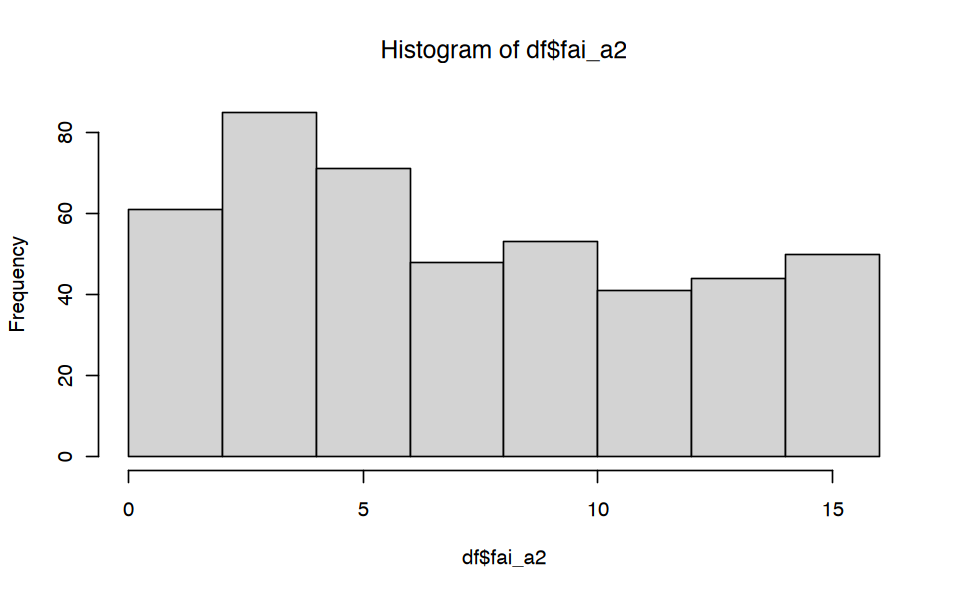

In [17]:
hist(df$fai_a2)

Metodi per stimare l'attendibilità: test paralleli, test-retest, split-half, consistenza interna.

In [44]:
df[, 1:4] |> psych::alpha()


Reliability analysis   
Call: psych::alpha(x = df[, 1:4])

  raw_alpha std.alpha G6(smc) average_r S/N   ase mean  sd median_r
      0.82      0.82    0.79      0.54 4.7 0.013  1.9 1.2     0.53

    95% confidence boundaries 
         lower alpha upper
Feldt     0.79  0.82  0.85
Duhachek  0.80  0.82  0.85

 Reliability if an item is dropped:
        raw_alpha std.alpha G6(smc) average_r S/N alpha se  var.r
FAI_129      0.74      0.74    0.67      0.49 2.9    0.021 0.0073
FAI_133      0.76      0.76    0.69      0.51 3.1    0.020 0.0095
FAI_25       0.77      0.77    0.71      0.53 3.3    0.019 0.0184
FAI_103      0.83      0.84    0.78      0.63 5.2    0.013 0.0021
        med.r
FAI_129  0.45
FAI_133  0.46
FAI_25   0.46
FAI_103  0.62

 Item statistics 
          n raw.r std.r r.cor r.drop mean  sd
FAI_129 453  0.86  0.85  0.81   0.73  2.1 1.4
FAI_133 453  0.85  0.84  0.77   0.69  1.6 1.6
FAI_25  453  0.81  0.82  0.74   0.67  2.4 1.3
FAI_103 453  0.72  0.72  0.56   0.52  1.6 1.4

Non m

In [55]:
rxx <- 0.82
sd(df$fai_a2) * sqrt(1 - rxx)

[1] 1.966737

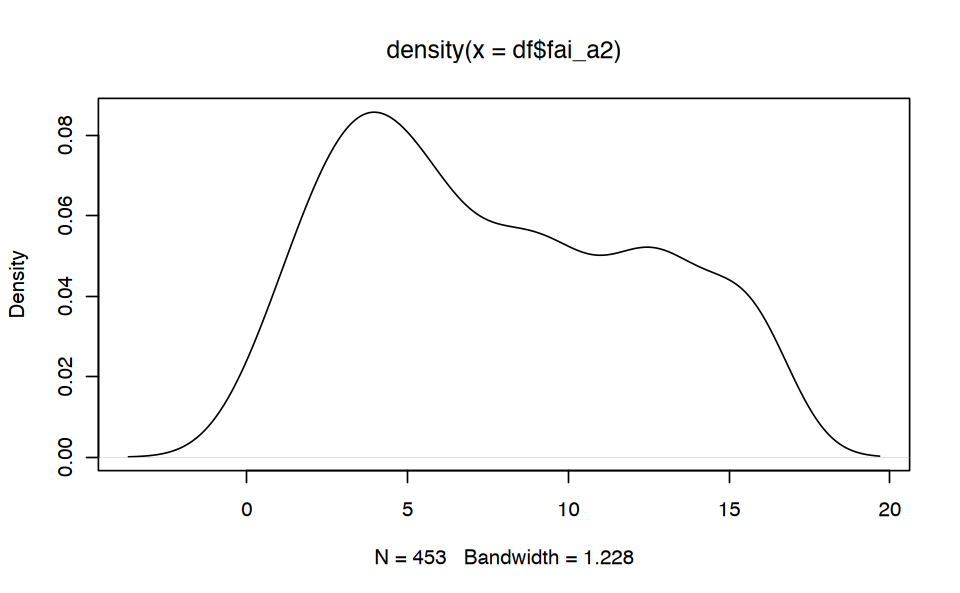

In [60]:
plot(density(df$fai_a2))

### Stima del Punteggio Vero

$\hat{T} = \bar{X} + r_{xx} (X - \bar{X})$

Consideriemo il punteggio di 10 sulla sottoscale FAI-2. La stima del punteggio vero diventa:

In [83]:
mean(df$fai_a2) + 0.82 * (10 - mean(df$fai_a2))

[1] 9.587947

$\sigma_{\hat{T}} = \sigma_X\sqrt{r_{xx'}(1 - r_{xx'})}$

Calcoliamo l'errore standard della stima del punteggio vero:

In [91]:
sd(df$fai_a2) * sqrt(0.82 * (1 - 0.82))

[1] 1.780956

In [92]:
?CI.tscore

CI.tscore             package:psychometric             R Documentation

_C_o_n_f_i_d_e_n_c_e _I_n_t_e_r_v_a_l_s _f_o_r _T_e_s_t _S_c_o_r_e_s

_D_e_s_c_r_i_p_t_i_o_n:

     Computes the CI for a desired level for observed scores and
     estimated true scores

_U_s_a_g_e:

     CI.tscore(obs, mx, s, rxx, level = 0.95)
     
     CI.obs(obs, s, rxx, level = 0.95)
     
_A_r_g_u_m_e_n_t_s:

     obs: Observed test score on test x

      mx: mean of test x

       s: standard deviation of test x

     rxx: reliability of test x

   level: Significance Level for constructing the CI, default is .95

_D_e_t_a_i_l_s:

     'CI.tscore' makes use of 'Est.true' to correct the observed score
     for regression to the mean and 'SE.Est' for the correct standard
     error. 'CI.tscore' also requires entry of the mean of the test
     scores for correcting for regression to the mean.
     'CI.obs' is much simpler in construction as it on

In [93]:
CI.tscore(10, mean(df$fai_a2), sd(df$fai_a2), 0.82, level = 0.95)

SE.Est,LCL,T.Score,UCL
<dbl>,<dbl>,<dbl>,<dbl>
1.780956,6.097337,9.587947,13.07856


## Session Info

In [51]:
sessionInfo()

R version 4.4.1 (2024-06-14)
Platform: aarch64-apple-darwin20
Running under: macOS 15.0.1

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/lib/libRlapack.dylib;  LAPACK version 3.12.0

locale:
[1] C

time zone: Europe/Rome
tzcode source: internal

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods  
[7] base     

other attached packages:
 [1] lavaanExtra_0.2.1 lavaanPlot_0.8.1  kableExtra_1.4.0 
 [4] corrplot_0.94     nortest_1.0-4     MASS_7.3-61      
 [7] ggokabeito_0.1.0  viridis_0.6.5     viridisLite_0.4.2
[10] ggpubr_0.6.0      ggExtra_0.10.1    gridExtra_2.3    
[13] patchwork_1.3.0   bayesplot_1.11.1  semTools_0.5-6   
[16] semPlot_1.1.6     lavaan_0.6-19     psych_2.4.6.26   
[19] scales_1.3.0      markdown_1.13     knitr_1.48       
[22] lubridate_1.9.3   forcats_1.0.0     stringr_1.5.1    
[25] dplyr_1.1.